# A machine learning forecasting model for covid-19 pandemic in italy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
df = pd.read_csv("covid data set.csv")


In [7]:
df.head()

,s.no,date,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,casi_testati,note_it,note_en
0,0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221.0,1.0,7.0,229.0,4324.0,NaN,NaN,NaN
1,1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93.0,1.0,10.0,322.0,8623.0,NaN,NaN,NaN
2,2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78.0,3.0,12.0,400.0,9587.0,NaN,NaN,NaN
3,3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250.0,45.0,17.0,650.0,12014.0,NaN,NaN,NaN
4,4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238.0,46.0,21.0,888.0,15695.0,NaN,NaN,NaN


In [8]:
df1 = df.drop(['casi_testati','note_it','note_en'],axis=1)


In [9]:
df1.describe()


,s.no,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01
mean,34.500000,17373.142857,2225.128571,19598.285714,41387.885714,60986.157143,1427.971429,3033.623188,22782.434783,11851.869565,95052.449275,6.660674e+05
std,20.351085,10475.956363,1330.399743,11743.460668,32774.474616,42510.504183,1642.323857,1751.986697,24496.367083,10335.555156,74859.968373,6.495580e+05
min,0.000000,101.000000,26.000000,127.000000,94.000000,221.000000,-3106.000000,78.000000,1.000000,7.000000,229.000000,4.324000e+03
25%,17.250000,6844.000000,1196.750000,8040.750000,5327.250000,13368.000000,229.250000,1872.000000,1258.000000,1016.000000,15113.000000,8.601100e+04
50%,34.500000,20522.500000,2325.500000,23118.000000,43170.000000,74704.000000,1192.000000,3047.000000,13030.000000,10779.000000,97689.000000,4.540300e+05
75%,51.750000,27262.750000,3392.250000,30674.500000,76257.500000,102077.500000,2605.250000,4207.000000,38092.000000,21645.000000,165155.000000,1.117404e+06
max,69.000000,29010.000000,4068.000000,33004.000000,83652.000000,108257.000000,4821.000000,6557.000000,79914.000000,28710.000000,209328.000000,2.108837e+06


In [10]:
df1.corr()

,s.no,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made
s.no,1.000000,0.759971,0.536125,0.738680,0.977207,0.957461,-0.305721,0.321376,0.936966,0.980681,0.988213,0.954373
hospitalized_with_symptoms,0.759971,1.000000,0.946883,0.999336,0.795108,0.889073,0.227592,0.727429,0.531224,0.733230,0.783737,0.577079
intensive_care,0.536125,0.946883,1.000000,0.957970,0.562762,0.698513,0.494737,0.860661,0.259598,0.489725,0.557233,0.310004
total_hospitalized,0.738680,0.999336,0.957970,1.000000,0.773043,0.872244,0.259074,0.746232,0.503251,0.709475,0.762164,0.549856
home_quarantine,0.977207,0.795108,0.562762,0.773043,1.000000,0.984526,-0.338854,0.282333,0.916690,0.992271,0.996846,0.938102
total_confirmed_cases,0.957461,0.889073,0.698513,0.872244,0.984526,1.000000,-0.189679,0.424065,0.843247,0.958564,0.976721,0.872630
variation_total_confirmed,-0.305721,0.227592,0.494737,0.259074,-0.338854,-0.189679,1.000000,0.776791,-0.551108,-0.410498,-0.337343,-0.517953
new_confirmed_cases,0.321376,0.727429,0.860661,0.746232,0.282333,0.424065,0.776791,1.000000,0.015667,0.194114,0.272983,0.059475
recovered,0.936966,0.531224,0.259598,0.503251,0.916690,0.843247,-0.551108,0.015667,1.000000,0.958052,0.938839,0.998181
deaths,0.980681,0.733230,0.489725,0.709475,0.992271,0.958564,-0.410498,0.194114,0.958052,1.000000,0.996455,0.972554


<AxesSubplot:>

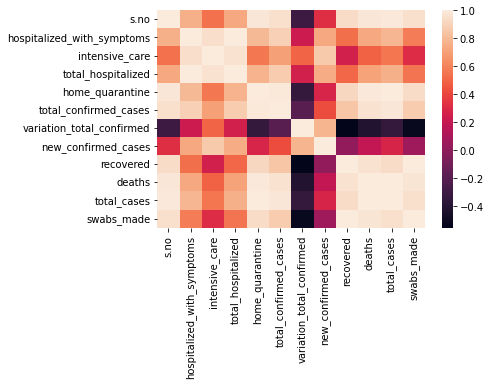

In [12]:
sns.heatmap(df1.corr())

In [13]:
df1.isnull().sum()

s.no                          0
date                          0
state                         0
hospitalized_with_symptoms    0
intensive_care                0
total_hospitalized            0
home_quarantine               0
total_confirmed_cases         0
variation_total_confirmed     0
new_confirmed_cases           1
recovered                     1
deaths                        1
total_cases                   1
swabs_made                    1
dtype: int64

<AxesSubplot:>

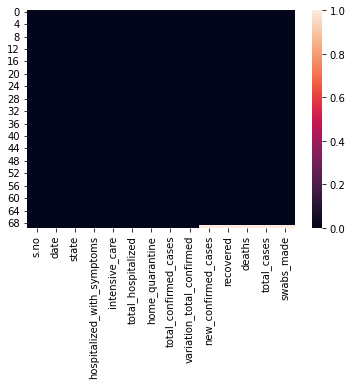

In [14]:
sns.heatmap(df1.isnull())


In [15]:
df1.columns

Index(['s.no', 'date', 'state', 'hospitalized_with_symptoms', 'intensive_care',
       'total_hospitalized', 'home_quarantine', 'total_confirmed_cases',
       'variation_total_confirmed', 'new_confirmed_cases', 'recovered',
       'deaths', 'total_cases', 'swabs_made'],
      dtype='object')

# Relation plot with scatter plots

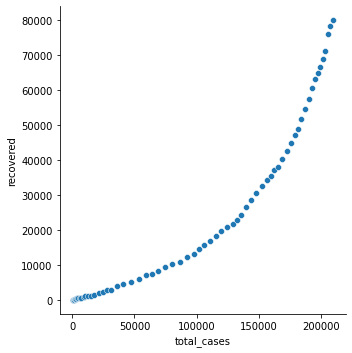

In [16]:
sns.relplot(x='total_cases',y='recovered',data=df)


<AxesSubplot:xlabel='total_cases', ylabel='deaths'>

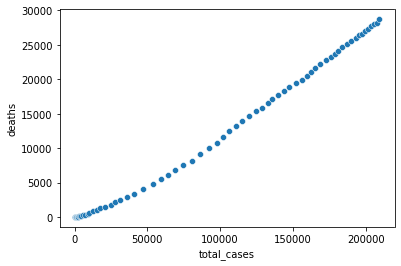

In [17]:
sns.scatterplot(x='total_cases',y='deaths',data=df)

In [18]:
case_morethan_20k = df.loc[df['total_cases']>20000,['total_cases','deaths','recovered']]


In [19]:
case_morethan_20k.head()

,total_cases,deaths,recovered
19,21157.0,1441.0,1966.0
20,24747.0,1809.0,2335.0
21,27980.0,2158.0,2749.0
22,31506.0,2503.0,2941.0
23,35713.0,2978.0,4025.0


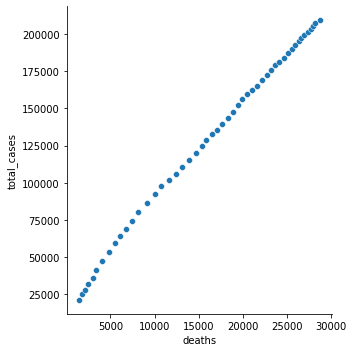

In [20]:
sns.relplot(x='deaths',y='total_cases',data=case_morethan_20k)
